In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//EDC_EYDC_MDC_regen"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario6_MDC-9K_minmax

dataset = np.load(workdir + "//MDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//MDC9K_dataset_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 2


In [6]:
x.shape

(8727, 23538)

In [7]:
training_image_array.shape

(7855, 23538)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [10]:
# The proportion of feature selection
perc = 70

In [11]:
# In[10]:


# Feature selection using f-regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, SelectFdr, SelectPercentile, SelectFromModel

# selection the percentile feature

Starttime = datetime.now()
print(Starttime)

sel = SelectPercentile(f_regression, percentile=perc).fit(train_X, train_y)
Endtime = datetime.now()
print(Endtime)
train_X = sel.transform(train_X)
train_X.shape

test_X = sel.transform(test_X)
test_X.shape
# In[11]:


2020-11-23 00:01:14.973302


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


2020-11-23 00:01:15.911794


(872, 16476)

In [12]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 16476)
7855 train samples
872 test samples


In [13]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(train_X, training_label_array)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-11-23 00:01:18.616565
EndTime : 2020-11-23 01:12:09.455748


In [14]:
import matplotlib
from matplotlib import pyplot as plt

In [15]:
predicted_classes = rf.predict(test_X)

In [16]:
predicted_value = predicted_classes

In [17]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//MDC9K_regen_feature_selection//RF"
joblib.dump(rf, workdir + '//MDC9K_RF_model_fs_70.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//MDC9K_regen_feature_selection//RF//MDC9K_RF_model_fs_70.pkl']

In [18]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//MDC9K_RF_pred_obs_table_fs_70.csv')

In [20]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7964808619844731, intercept=-0.13041205279374057, rvalue=0.8269667067473793, pvalue=8.986097369650417e-220, stderr=0.0183593730528869)

In [21]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.6341409489883766


In [22]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.152817707068776


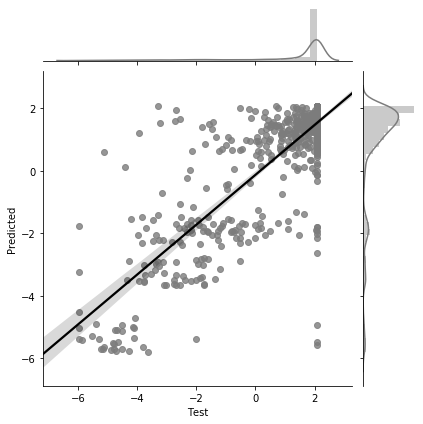

In [23]:
workdir = "D://DrugResponsivenessGuideline_log//Figures//Backbone//MDC-9K_regen_feature_selection"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MDC9K_RF_fs_70.png', dpi=300)